In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
column_name = ["Population","Profit"]  
data = pd.read_csv(r'C:\Users\HP\Downloads\Cohort4-master\Cohort4-master\beginner\machine-learning\week02\ex1data1.txt', names = column_name)
            

In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [5]:
corr = data.corr()
corr.style.background_gradient(cmap='Spectral')

,Population,Profit
Population,1,0.837873
Profit,0.837873,1


In [6]:
cov = data.cov()
cov.style.background_gradient(cmap='Spectral')

,Population,Profit
Population,14.976,17.8669
Profit,17.8669,30.363


In [7]:
# Create the pandas DataFrame with the list and add column headers
dataset= pd.DataFrame(data, columns = ['Population', 'Profit']) 

print(dataset)
print('Datatype of X and Y : ', type(dataset))


# Split the dataset into input (feature X) and output (Target y) from Pandas dataFrame named dataset

X = dataset.iloc[:, :-1].values #All rows, all columns excluding the last column indexed -1
y = dataset.iloc[:, 1].values #All rows, column 1

print ('\n Input Feature X = ', X, '\n The shape of X = ',X.shape,  ' \n Output (Y) = ', y, '\n Shape of y = ',y.shape)
print('Datatype of X and Y : ', type(X), type(y))

    Population    Profit
0       6.1101  17.59200
1       5.5277   9.13020
2       8.5186  13.66200
3       7.0032  11.85400
4       5.8598   6.82330
5       8.3829  11.88600
6       7.4764   4.34830
7       8.5781  12.00000
8       6.4862   6.59870
9       5.0546   3.81660
10      5.7107   3.25220
11     14.1640  15.50500
12      5.7340   3.15510
13      8.4084   7.22580
14      5.6407   0.71618
15      5.3794   3.51290
16      6.3654   5.30480
17      5.1301   0.56077
18      6.4296   3.65180
19      7.0708   5.38930
20      6.1891   3.13860
21     20.2700  21.76700
22      5.4901   4.26300
23      6.3261   5.18750
24      5.5649   3.08250
25     18.9450  22.63800
26     12.8280  13.50100
27     10.9570   7.04670
28     13.1760  14.69200
29     22.2030  24.14700
..         ...       ...
67     10.2360   7.77540
68      5.4994   1.01730
69     20.3410  20.99200
70     10.1360   6.67990
71      7.3345   4.02590
72      6.0062   1.27840
73      7.2259   3.34110
74      5.0269  -2.68070


In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
regressor.score(X,y)

0.7020315537841397

In [10]:
print(regressor.intercept_)

-3.89578087831185


In [11]:
regressor.coef_

array([1.19303364])

In [12]:
y_pred = regressor.predict(X)

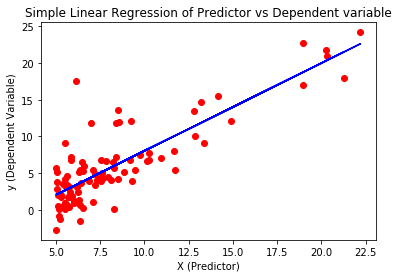

In [13]:
# Visualising the results
plt.scatter(X, y, color = 'red') #Scatter plot of the X an y dataset

plt.plot(X, regressor.predict(X), color = 'blue')#Line plot of X against predicted Y 
#(remember that output of regressor.predict is yhat)

plt.title('Simple Linear Regression of Predictor vs Dependent variable')
plt.xlabel('X (Predictor)')
plt.ylabel('y (Dependent Variable)')
plt.show()

In [14]:
def predict():
    input_ = float(input('Enter the population size(10,000): '))
    print("For a population of {}, the estimated profit is ${}".format(input_,(input_ * 1.19303364) -3.89578087831185))

In [15]:
predict()

Enter the population size(10,000): 6.1101
For a population of 6.1101, the estimated profit is $3.3937739654521497


In [16]:
#Predicting the Dataset results on input feature alone

y_pred = regressor.predict(X)
#Note: store the result in y_pred

In [17]:
   #Adding the result column to the existing dataset table

dataset['yhat'] = y_pred

dataset.head()

,Population,Profit,yhat
0,6.1101,17.5920,3.393774
1,5.5277,9.1302,2.698951
2,8.5186,13.6620,6.267196
3,7.0032,11.8540,4.459272
4,5.8598,6.8233,3.095158


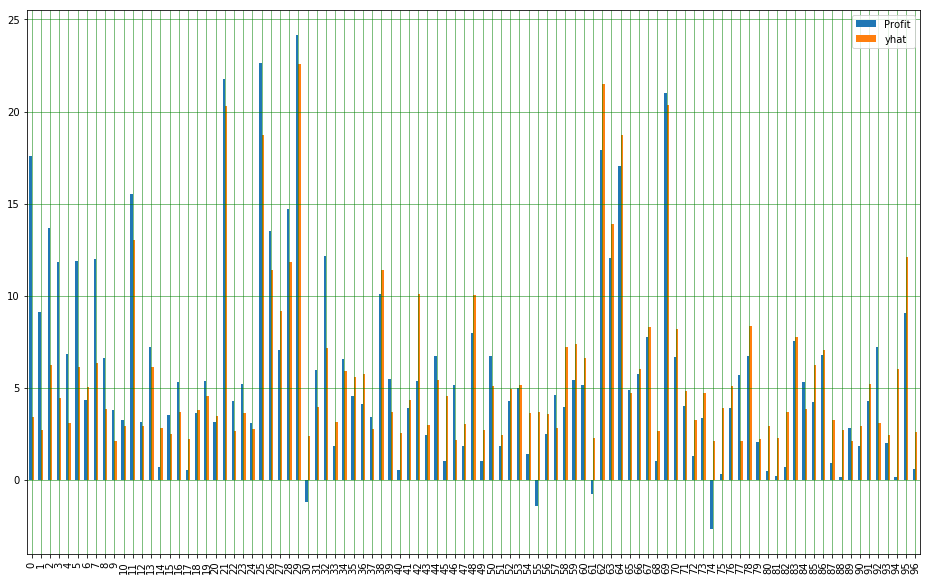

In [19]:
#A bar plot showing the diffrence between actual value (y) and predicted value (yhat)
dataset[['Profit','yhat']].plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()